<a href="https://colab.research.google.com/github/PrinceRaj1161/PrinceRaj_Futurecart_Infy_Nov24/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic checks

## Importing Library

In [165]:
import pandas as pd

fb = pd.read_excel('/content/ProductA_fb_impressions.xlsx')

google = pd.read_excel('/content/ProductA_google_clicks.xlsx')

product = pd.read_excel('/content/ProductA.xlsx')



In [166]:
fb.head()

,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678


In [167]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


No null values.

In [168]:
google.head()

,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451


In [169]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Clicks     212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


No null values

In [170]:
product.head()

,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


In [171]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Quantity   212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [172]:
df = product.merge(fb,how="left", on='Day Index').merge(google,how='left', on='Day Index')

In [173]:
df.describe()

,Day Index,Quantity,Impressions,Clicks
count,212,212.000000,212.000000,212.00000
mean,2022-03-16 12:00:00,17.542453,1531.702830,358.20283
min,2021-12-01 00:00:00,5.000000,620.000000,60.00000
25%,2022-01-22 18:00:00,13.750000,1209.750000,154.00000
50%,2022-03-16 12:00:00,17.000000,1460.000000,402.50000
75%,2022-05-08 06:00:00,21.000000,1862.000000,492.75000
max,2022-06-30 00:00:00,38.000000,2707.000000,726.00000
std,NaN,5.790423,440.660783,164.52160


# Outliers

In [174]:
import numpy as np

# Function to detect outliers using Z-score
def z_score_outliers(df, column):
    threshold = 3
    mean = np.mean(df[column])
    std = np.std(df[column])
    df['Z-score'] = (df[column] - mean) / std
    return df[np.abs(df['Z-score']) > threshold]

# Detect outliers in Quantity, Impressions, and Clicks
quantity_outliers = z_score_outliers(df, 'Quantity')
impressions_outliers = z_score_outliers(df, 'Impressions')
clicks_outliers = z_score_outliers(df, 'Clicks')

print("Quantity Outliers:\n", quantity_outliers)
print("Impressions Outliers:\n", impressions_outliers)
print("Clicks Outliers:\n", clicks_outliers)


Quantity Outliers:
      Day Index  Quantity  Impressions  Clicks   Z-score
9   2021-12-10        38         1129     391  3.541359
78  2022-02-17        38         2351     505  3.541359
142 2022-04-22        36         1163     470  3.195144
Impressions Outliers:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks, Z-score]
Index: []
Clicks Outliers:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks, Z-score]
Index: []


In [175]:
# Function to detect outliers using IQR
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in Quantity, Impressions, and Clicks
quantity_outliers_iqr = iqr_outliers(df, 'Quantity')
impressions_outliers_iqr = iqr_outliers(df, 'Impressions')
clicks_outliers_iqr = iqr_outliers(df, 'Clicks')

print("Quantity Outliers (IQR):\n", quantity_outliers_iqr)
print("Impressions Outliers (IQR):\n", impressions_outliers_iqr)
print("Clicks Outliers (IQR):\n", clicks_outliers_iqr)


Quantity Outliers (IQR):
      Day Index  Quantity  Impressions  Clicks   Z-score
4   2021-12-05        33          678     451  0.565377
9   2021-12-10        38         1129     391  0.199821
78  2022-02-17        38         2351     505  0.894379
113 2022-03-24        32         1321     547  1.150269
142 2022-04-22        36         1163     470  0.681137
Impressions Outliers (IQR):
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks, Z-score]
Index: []
Clicks Outliers (IQR):
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks, Z-score]
Index: []


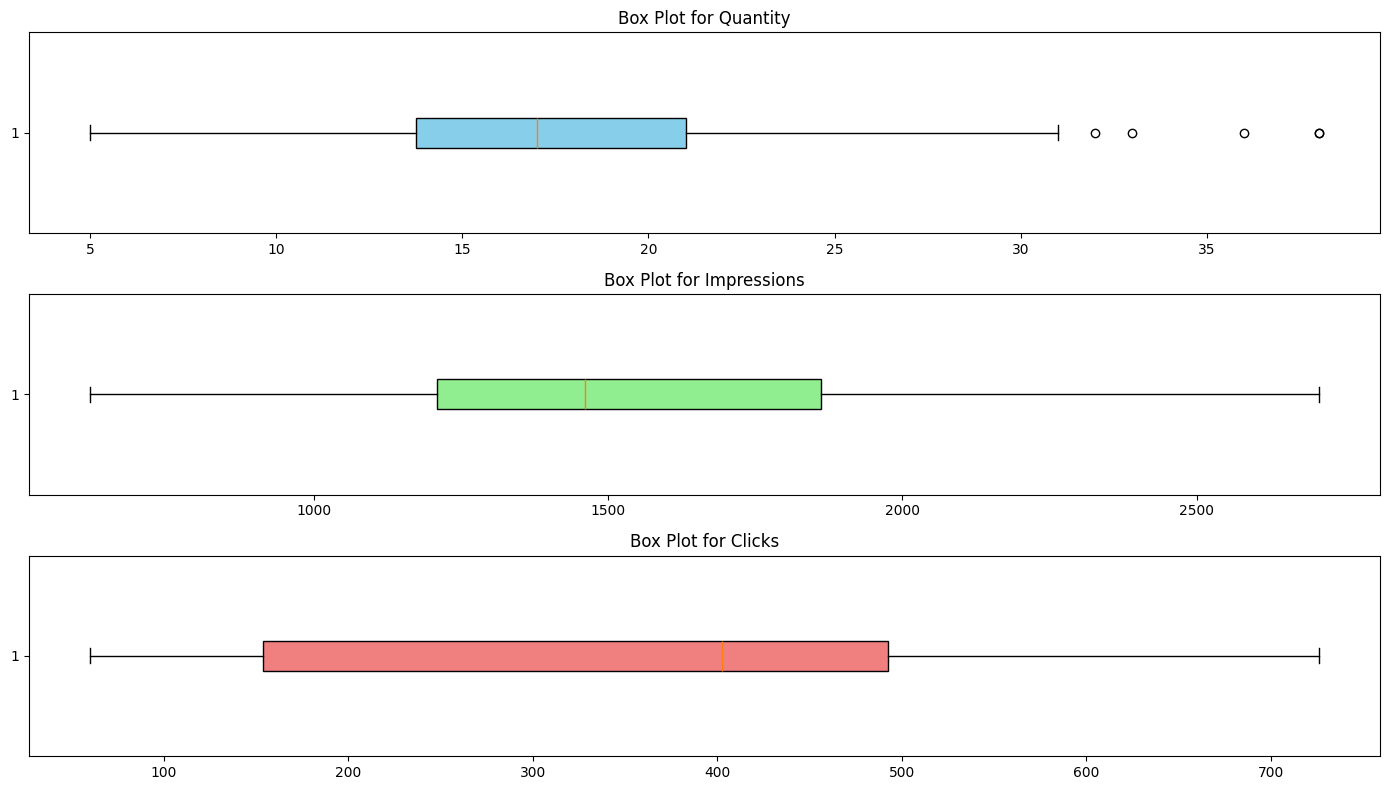

In [176]:
plt.figure(figsize=(14, 8))

# Box plot for Quantity
plt.subplot(3, 1, 1)
plt.boxplot(df['Quantity'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot for Quantity')

# Box plot for Impressions
plt.subplot(3, 1, 2)
plt.boxplot(df['Impressions'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot for Impressions')

# Box plot for Clicks
plt.subplot(3, 1, 3)
plt.boxplot(df['Clicks'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot for Clicks')

plt.tight_layout()
plt.show()


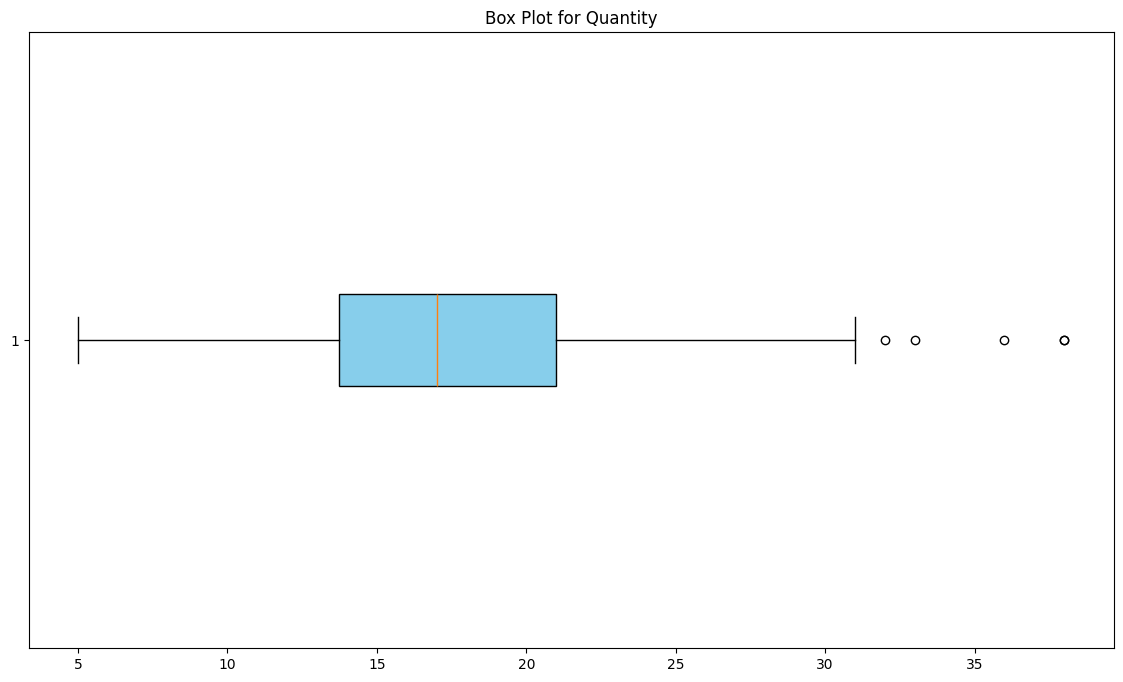

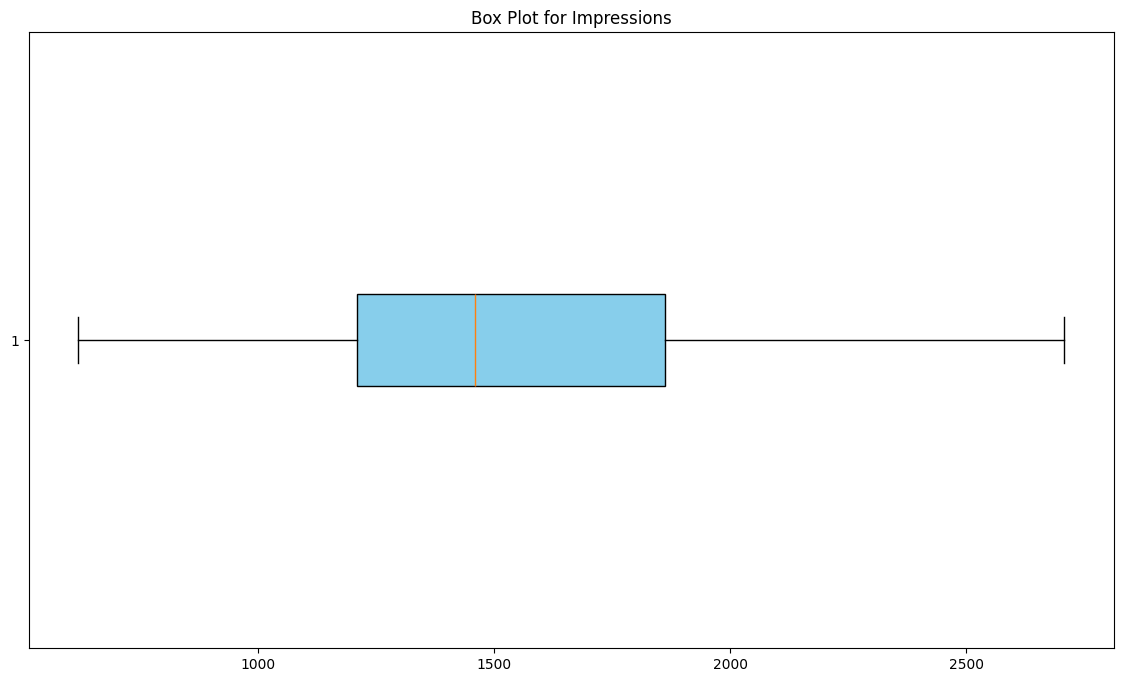

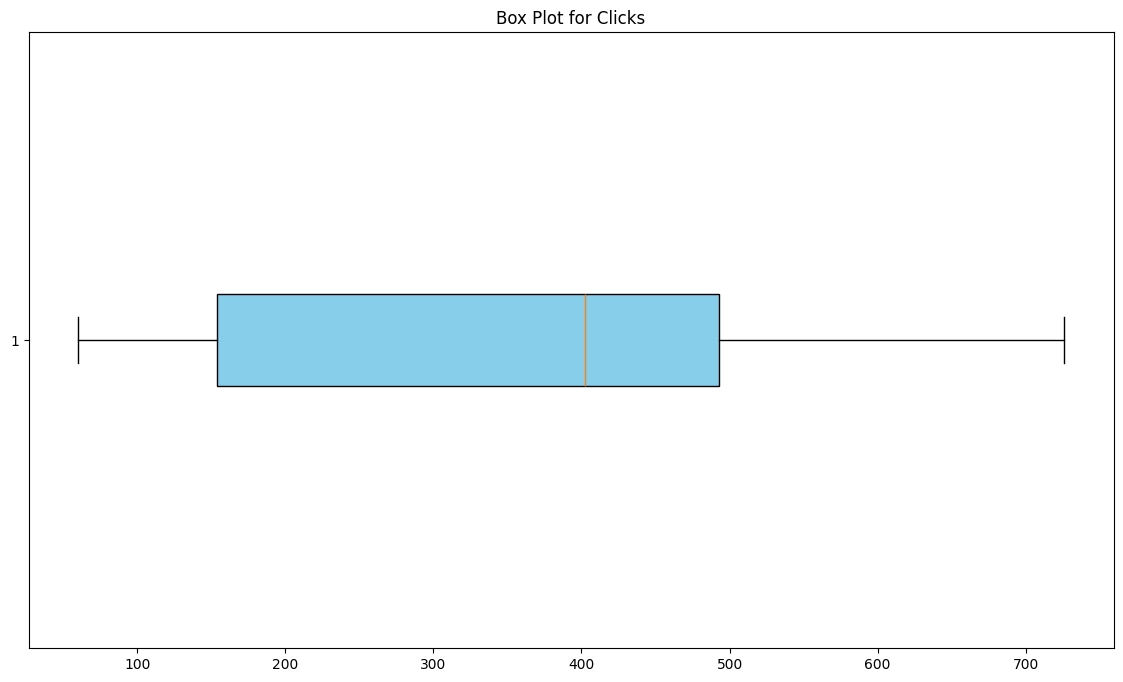

Indices of Quantity Outliers: [4, 9, 78, 113, 142]
Indices of Impressions Outliers: []
Indices of Clicks Outliers: []


In [177]:
import numpy as np

def box_plot_and_outliers(df, column):
    plt.figure(figsize=(14, 8))

    # Box plot
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Box Plot for {column}')
    plt.show()

    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index.tolist()

# Get indices of outliers
quantity_outliers_indices = box_plot_and_outliers(df, 'Quantity')
impressions_outliers_indices = box_plot_and_outliers(df, 'Impressions')
clicks_outliers_indices = box_plot_and_outliers(df, 'Clicks')

print("Indices of Quantity Outliers:", quantity_outliers_indices)
print("Indices of Impressions Outliers:", impressions_outliers_indices)
print("Indices of Clicks Outliers:", clicks_outliers_indices)


In [178]:
def replace_outliers_with_percentile(df, column, percentile=0.97):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the 97th percentile value
    percentile_value = df[column].quantile(percentile)

    # Replace outliers with the 97th percentile value
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = percentile_value
    return df

# Replace outliers in Quantity, Impressions, and Clicks
df = replace_outliers_with_percentile(df, 'Quantity')
df = replace_outliers_with_percentile(df, 'Impressions')
df = replace_outliers_with_percentile(df, 'Clicks')

# print("Data after replacing outliers:\n", df)


<ipython-input-178-18cb220386cf>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.669999999999987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = percentile_value
<ipython-input-178-18cb220386cf>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2413.539999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = percentile_value
<ipython-input-178-18cb220386cf>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '588.0499999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype firs

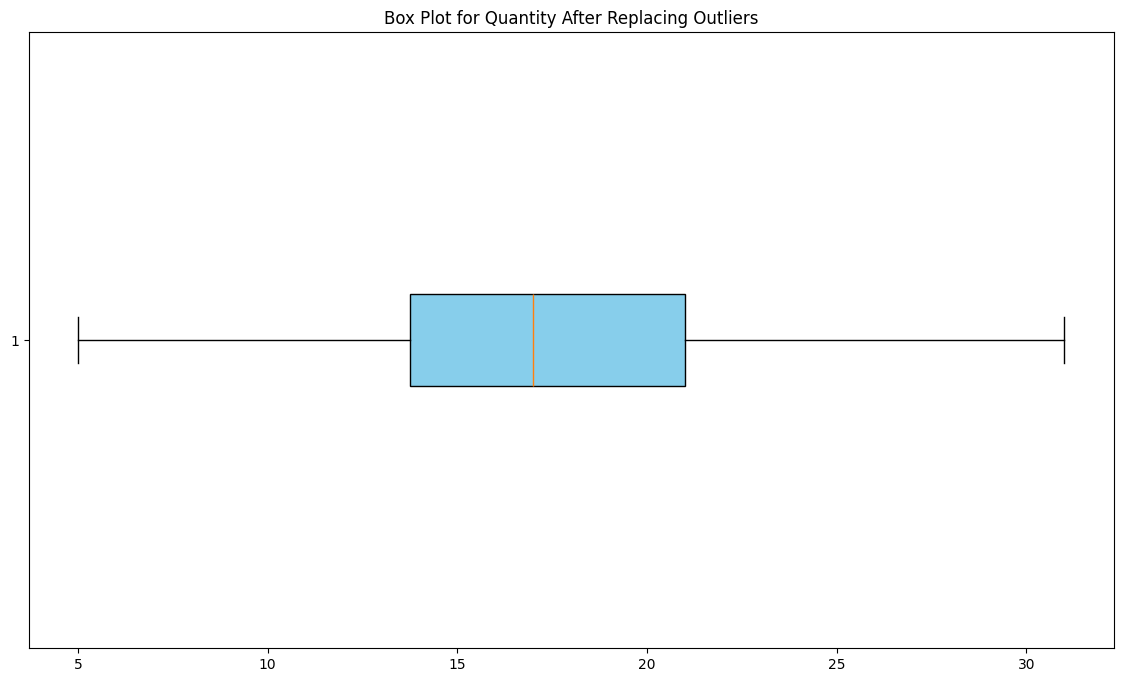

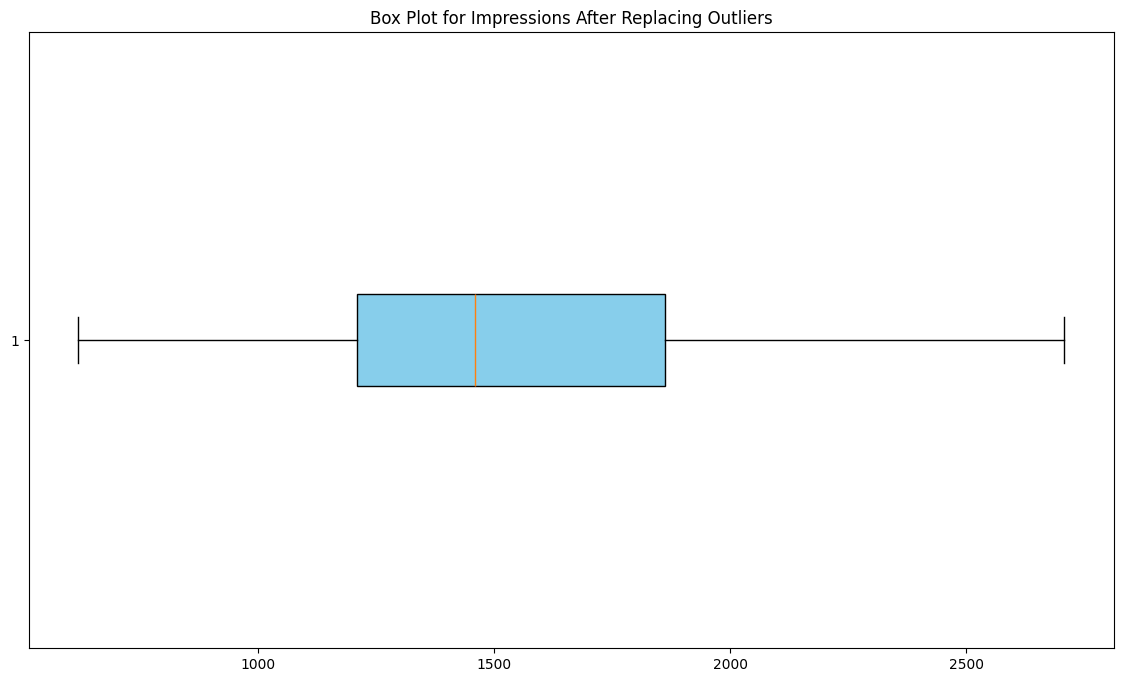

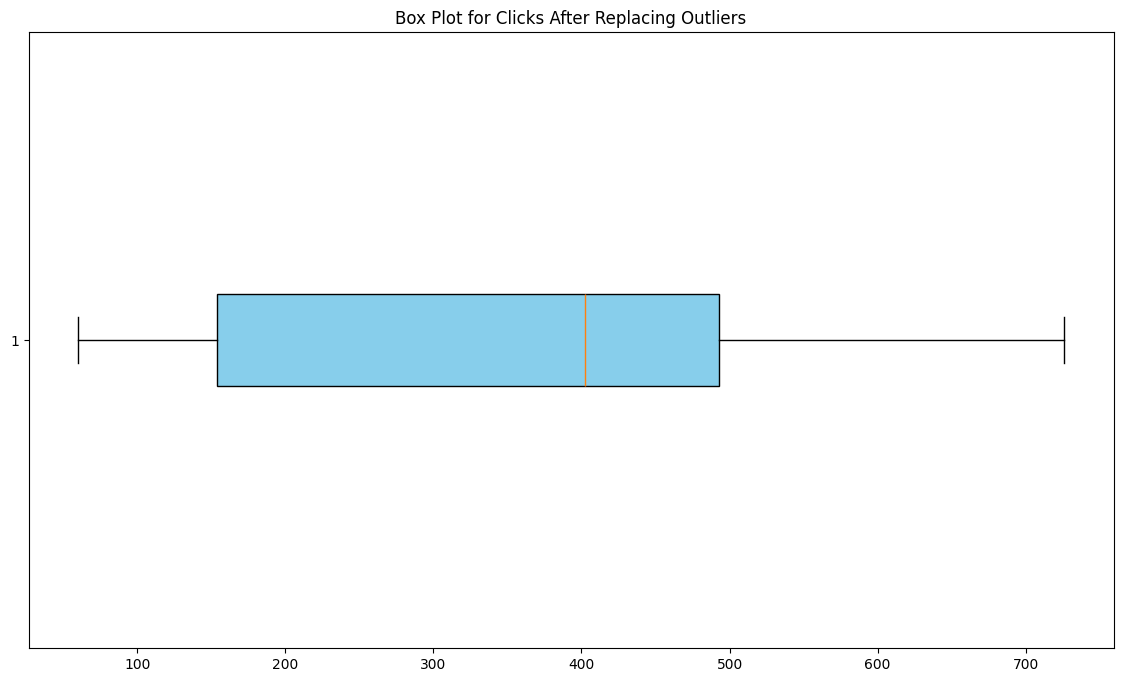

In [179]:
def plot_box(df, column):
    plt.figure(figsize=(14, 8))
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Box Plot for {column} After Replacing Outliers')
    plt.show()

# Plot box plots for Quantity, Impressions, and Clicks after replacing outliers
plot_box(df, 'Quantity')
plot_box(df, 'Impressions')
plot_box(df, 'Clicks')


In [180]:
df.head()

,Day Index,Quantity,Impressions,Clicks,Z-score
0,2021-12-01,14.00,620.0,445.0,0.528822
1,2021-12-02,10.00,890.0,433.0,0.455710
2,2021-12-03,13.00,851.0,424.0,0.400877
3,2021-12-04,22.00,881.0,427.0,0.419155
4,2021-12-05,30.67,678.0,451.0,0.565377


In [181]:
df.drop(columns=['Z-score'], inplace=True)

In [182]:
# Extract year, month, and day into separate columns
df['Year'] = df['Day Index'].dt.year
df['Month'] = df['Day Index'].dt.month
df['Day'] = df['Day Index'].dt.day


# Display the updated DataFrame
print(df)

     Day Index  Quantity  Impressions  Clicks  Year  Month  Day
0   2021-12-01     14.00        620.0   445.0  2021     12    1
1   2021-12-02     10.00        890.0   433.0  2021     12    2
2   2021-12-03     13.00        851.0   424.0  2021     12    3
3   2021-12-04     22.00        881.0   427.0  2021     12    4
4   2021-12-05     30.67        678.0   451.0  2021     12    5
..         ...       ...          ...     ...   ...    ...  ...
207 2022-06-26     13.00       1218.0   114.0  2022      6   26
208 2022-06-27     16.00       1311.0   106.0  2022      6   27
209 2022-06-28     13.00        885.0   109.0  2022      6   28
210 2022-06-29     16.00       1000.0    60.0  2022      6   29
211 2022-06-30      8.00        875.0    65.0  2022      6   30

[212 rows x 7 columns]


In [183]:
#df.drop(columns=['Year'], inplace=True)

In [184]:
df.head()

,Day Index,Quantity,Impressions,Clicks,Year,Month,Day
0,2021-12-01,14.00,620.0,445.0,2021,12,1
1,2021-12-02,10.00,890.0,433.0,2021,12,2
2,2021-12-03,13.00,851.0,424.0,2021,12,3
3,2021-12-04,22.00,881.0,427.0,2021,12,4
4,2021-12-05,30.67,678.0,451.0,2021,12,5


In [185]:
# Calculate Conversion Rate
df['Conversion Rate'] = df['Clicks'] / df['Impressions'] * 100

# Graphs

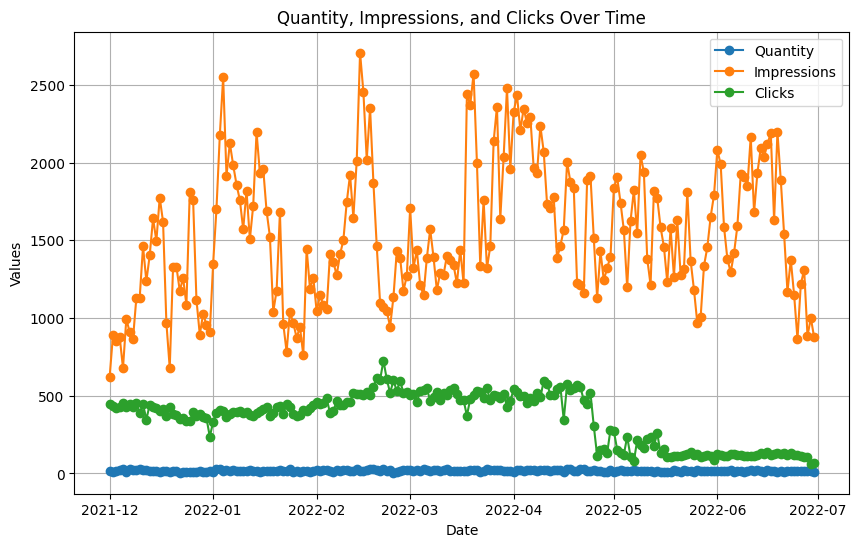

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Quantity over Time
plt.plot(df['Day Index'], df['Quantity'], marker='o', label='Quantity')

# Plot Impressions over Time
plt.plot(df['Day Index'], df['Impressions'], marker='o', label='Impressions')

# Plot Clicks over Time
plt.plot(df['Day Index'], df['Clicks'], marker='o', label='Clicks')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Quantity, Impressions, and Clicks Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [187]:
# Aggregate total quantity for each month
monthly_quantity = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Create a 'Month-Year' column for better labeling
monthly_quantity['Month-Year'] = monthly_quantity['Year'].astype(str) + '-' + monthly_quantity['Month'].astype(str)


In [188]:
monthly_quantity

,Year,Month,Quantity,Month-Year
0,2021,12,485.34,2021-12
1,2022,1,533.00,2022-1
2,2022,2,546.67,2022-2
3,2022,3,618.67,2022-3
4,2022,4,593.67,2022-4
5,2022,5,471.00,2022-5
6,2022,6,447.00,2022-6


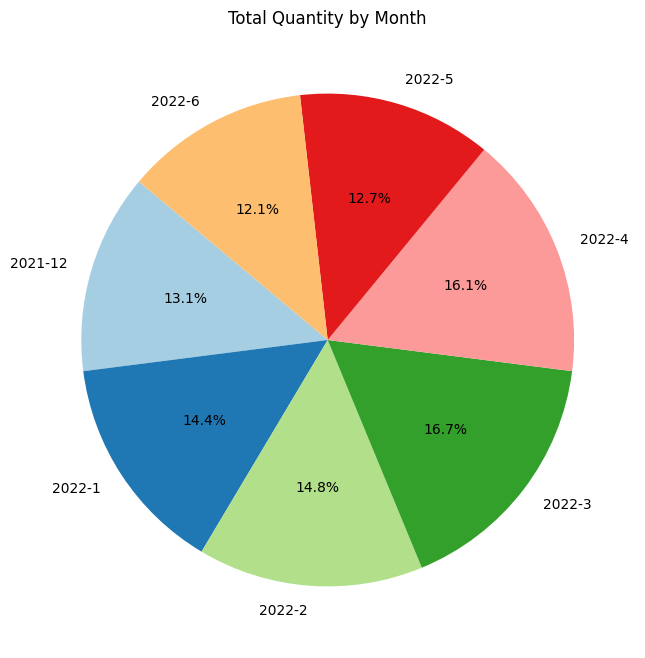

In [189]:
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(monthly_quantity['Quantity'], labels=monthly_quantity['Month-Year'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Quantity by Month')
plt.show()


In [190]:
# Aggregate total quantity for each date
daily_quantity = df.groupby(df['Day'])['Quantity'].sum().reset_index()

# Display the updated DataFrame
print(daily_quantity)


    Day  Quantity
0     1    107.00
1     2    121.00
2     3    146.00
3     4    128.00
4     5    158.67
5     6    110.00
6     7    149.00
7     8    121.00
8     9    134.00
9    10    141.67
10   11    137.00
11   12    131.00
12   13    132.00
13   14    118.00
14   15    100.00
15   16    109.00
16   17    133.67
17   18    135.00
18   19    121.00
19   20    117.00
20   21    135.00
21   22    111.67
22   23    102.00
23   24    120.67
24   25    109.00
25   26    118.00
26   27    108.00
27   28    107.00
28   29     90.00
29   30     86.00
30   31     58.00


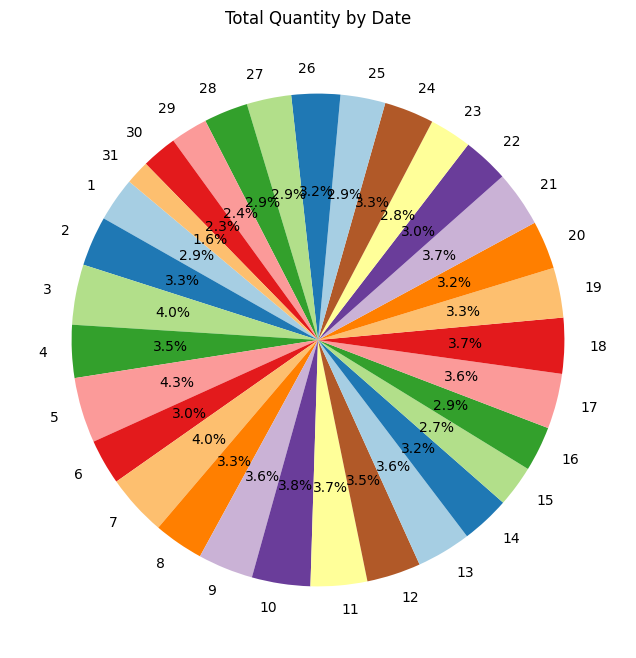

In [191]:
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(daily_quantity['Quantity'], labels=daily_quantity['Day'].astype(str), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Quantity by Date')
plt.show()


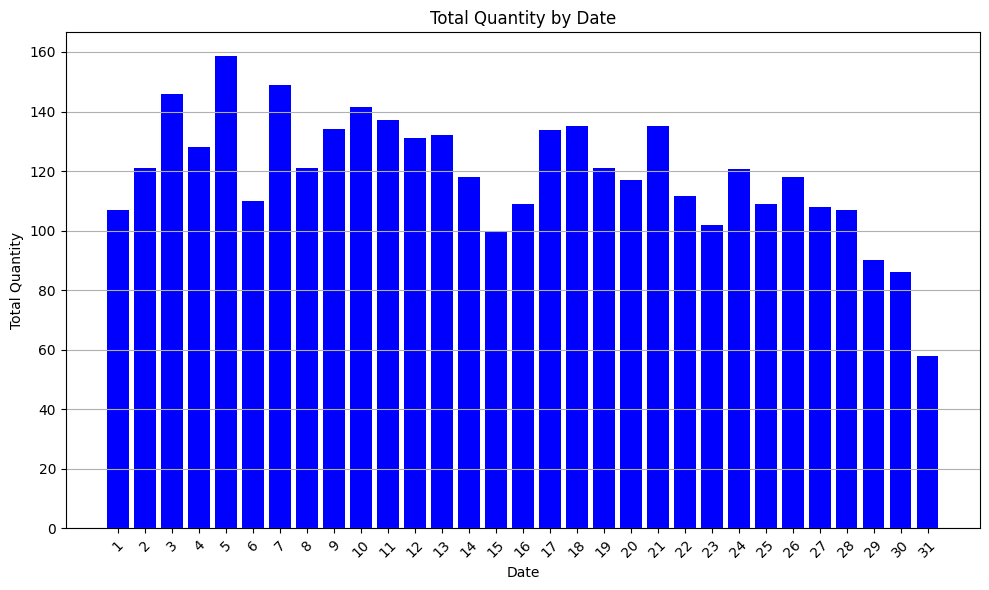

In [192]:
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(daily_quantity['Day'].astype(str), daily_quantity['Quantity'], color='blue')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Date')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [193]:
# Create cluster groups of 5 days

df['Cluster'] = (df['Day'] // 5) + 1

# Aggregate total quantity for each cluster
cluster_quantity = df.groupby('Cluster')['Quantity'].sum().reset_index()

# Display the updated DataFrame
print(cluster_quantity)





   Cluster  Quantity
0        1    502.00
1        2    672.67
2        3    659.67
3        4    598.67
4        5    586.34
5        6    532.00
6        7    144.00


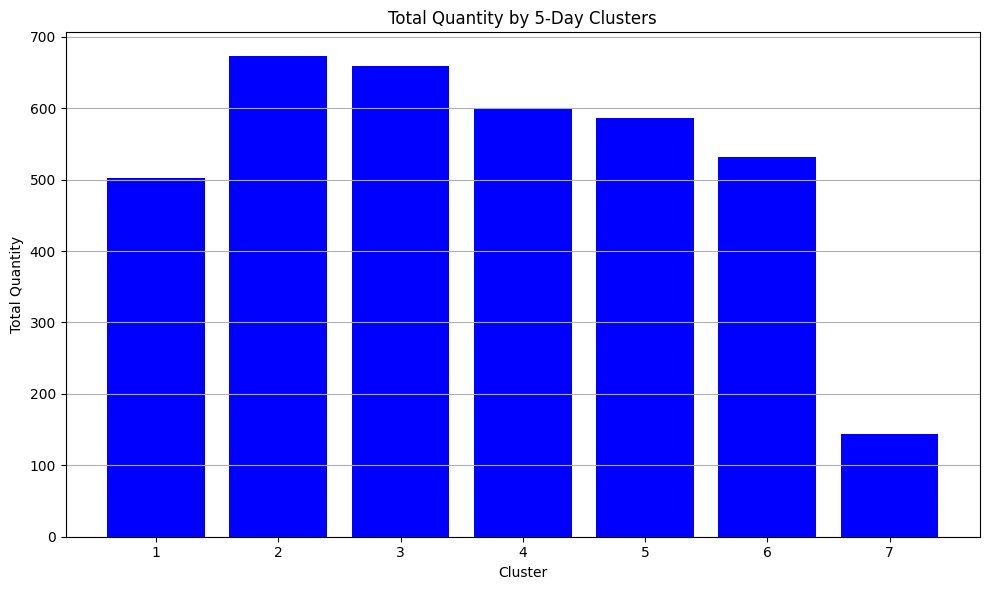

In [194]:
plt.figure(figsize=(10, 6))

# Plot the bar chart for each cluster
plt.bar(cluster_quantity['Cluster'], cluster_quantity['Quantity'], color='blue')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by 5-Day Clusters')
plt.xticks(cluster_quantity['Cluster'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


By the end of the month, we notice decrease in total quantity

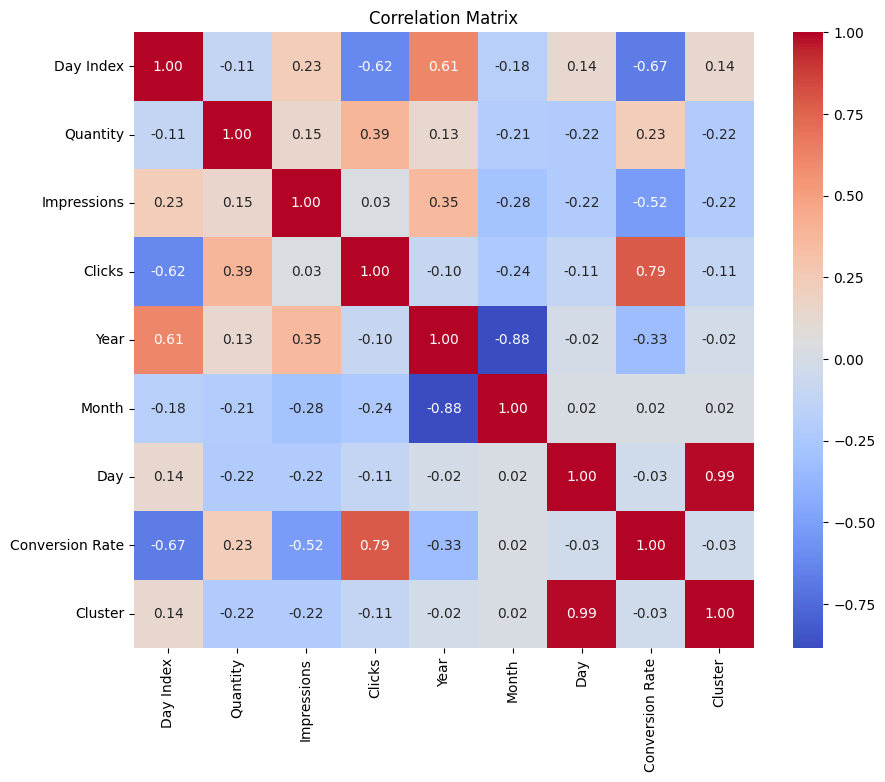

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


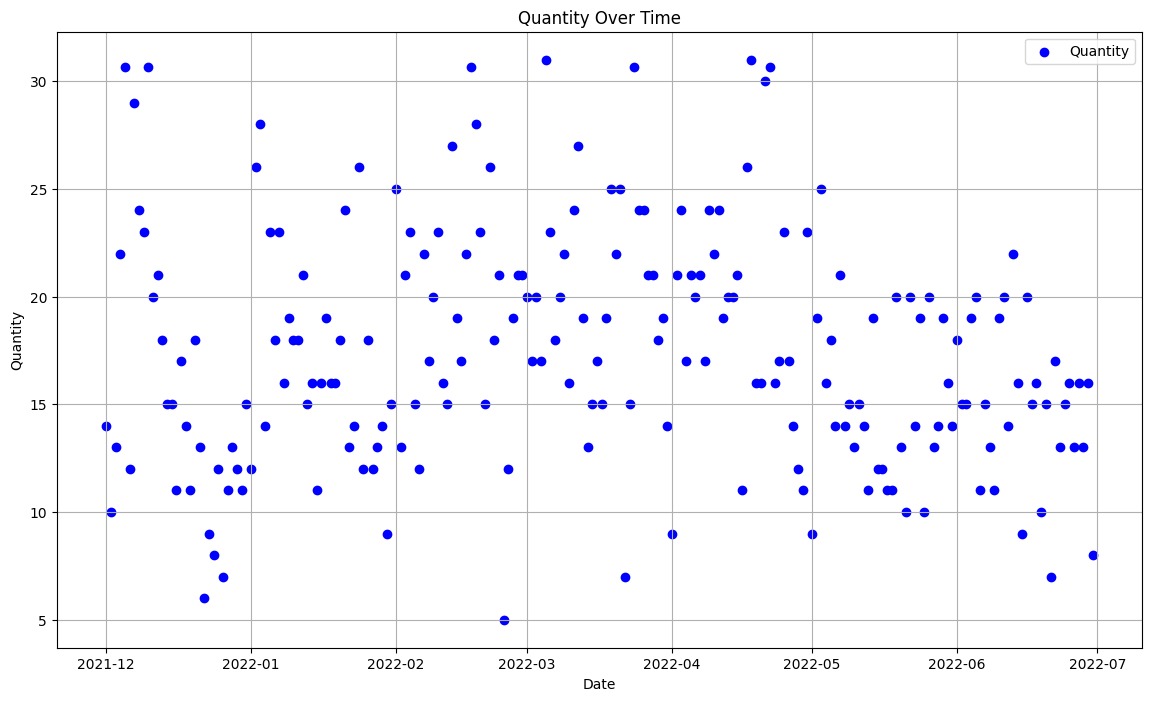

In [196]:
plt.figure(figsize=(14, 8))

# Plot Quantity over time
plt.scatter(df['Day Index'], df['Quantity'], marker='o', label='Quantity', color='blue')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity Over Time')
plt.legend()
plt.grid(True)
plt.show()


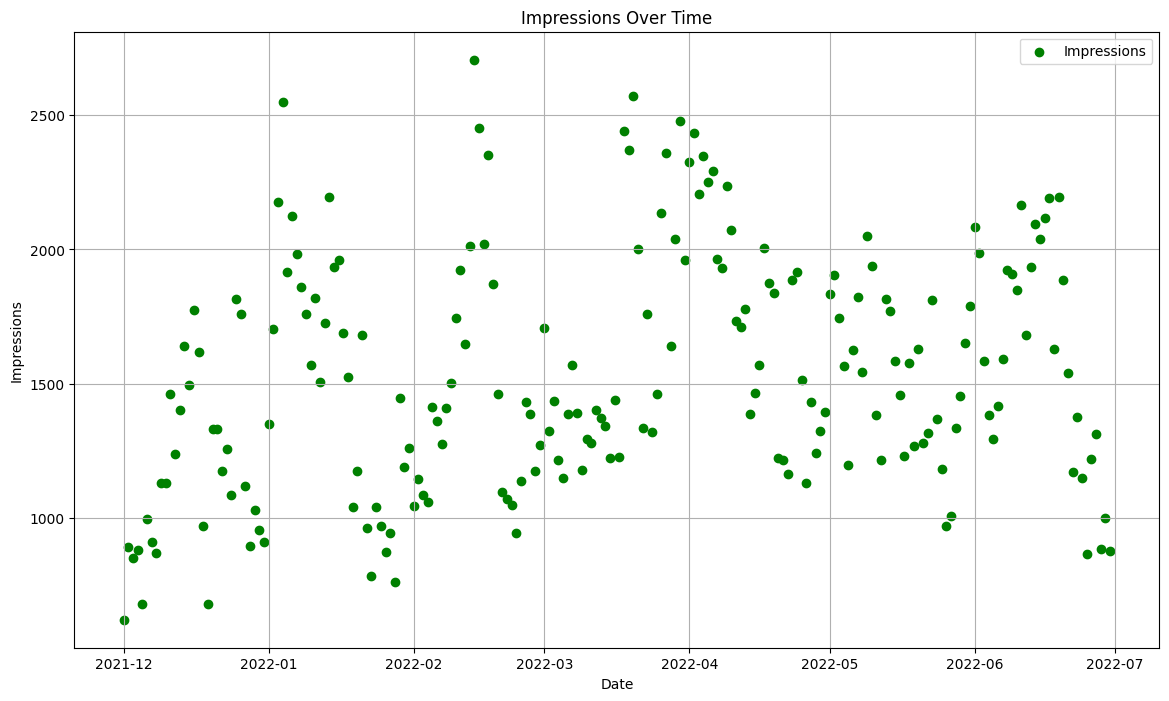

In [197]:
plt.figure(figsize=(14, 8))

# Plot Impressions over time
plt.scatter(df['Day Index'], df['Impressions'], marker='o', label='Impressions', color='green')

plt.xlabel('Date')
plt.ylabel('Impressions')
plt.title('Impressions Over Time')
plt.legend()
plt.grid(True)
plt.show()



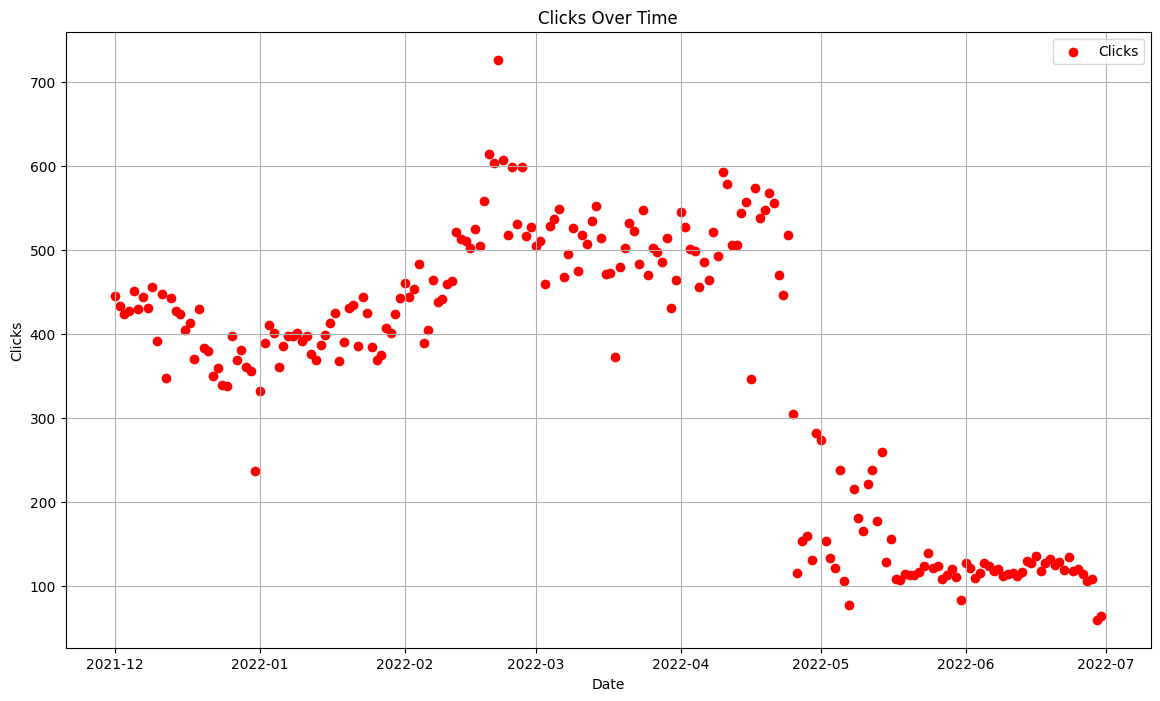

In [198]:
plt.figure(figsize=(14, 8))

# Plot Clicks over time
plt.scatter(df['Day Index'], df['Clicks'], marker='o', label='Clicks', color='red')

plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Clicks Over Time')
plt.legend()
plt.grid(True)
plt.show()


Decreases with date

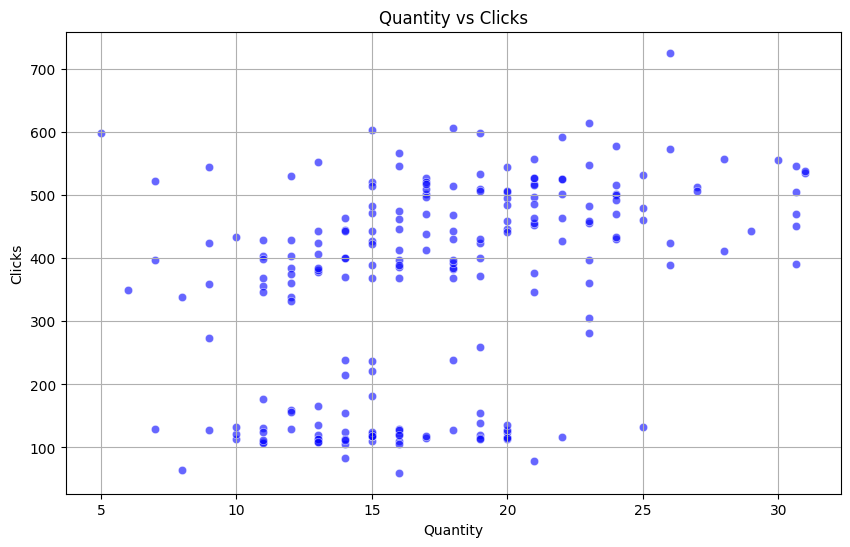

In [199]:
plt.figure(figsize=(10, 6))

# Scatter plot of Quantity vs Clicks
plt.scatter(df['Quantity'], df['Clicks'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Quantity')
plt.ylabel('Clicks')
plt.title('Quantity vs Clicks')
plt.grid(True)
plt.show()


As we get above 20 quantity, then we can say that clicks are normally greater.

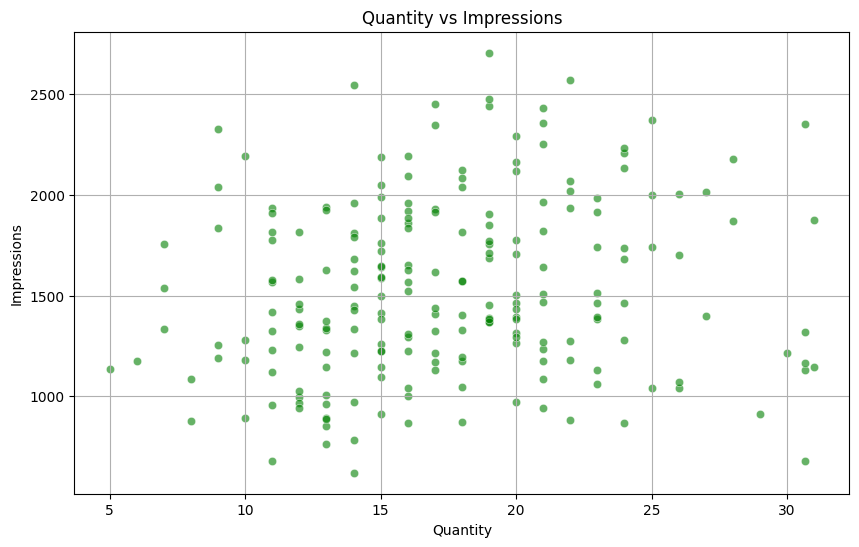

In [200]:
plt.figure(figsize=(10, 6))

# Scatter plot of Quantity vs Impressions
plt.scatter(df['Quantity'], df['Impressions'], color='green', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Quantity')
plt.ylabel('Impressions')
plt.title('Quantity vs Impressions')
plt.grid(True)
plt.show()


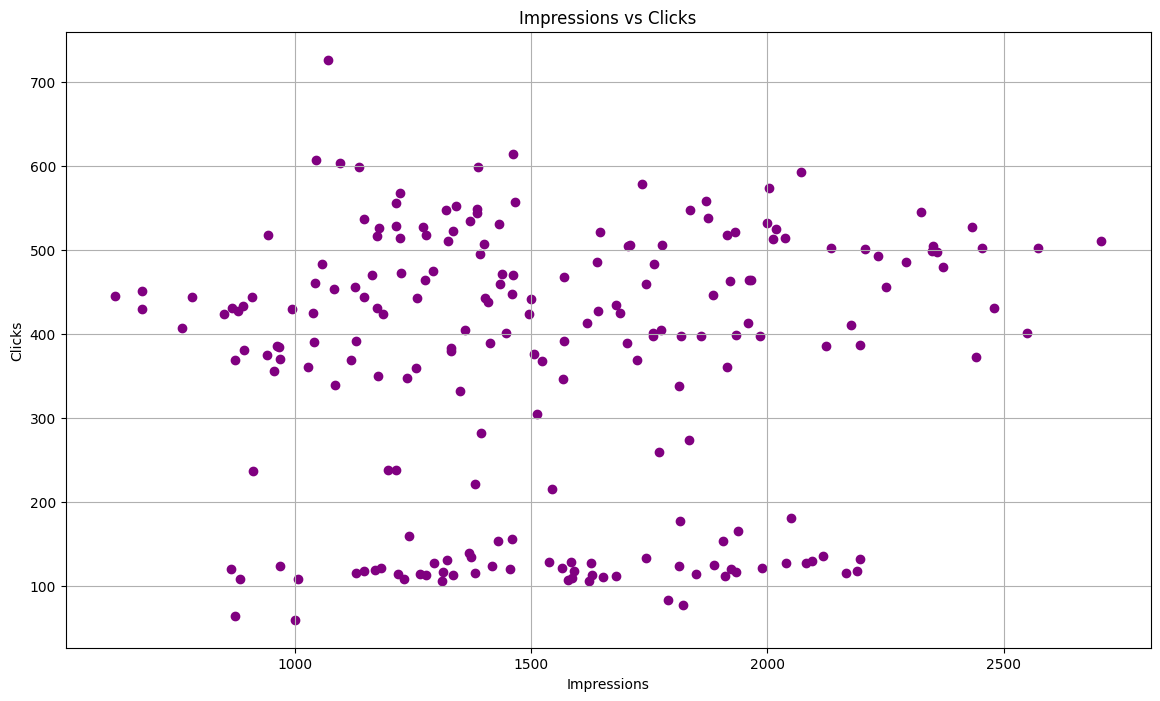

In [201]:
plt.figure(figsize=(14, 8))

# Plot Impressions vs Clicks
plt.scatter(df['Impressions'], df['Clicks'], marker='o', linestyle='-', color='purple')

plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions vs Clicks')
plt.grid(True)
plt.show()


If Impression is more than 2000 then, click is genenerally more.

In [202]:
df.head()

,Day Index,Quantity,Impressions,Clicks,Year,Month,Day,Conversion Rate,Cluster
0,2021-12-01,14.00,620.0,445.0,2021,12,1,71.774194,1
1,2021-12-02,10.00,890.0,433.0,2021,12,2,48.651685,1
2,2021-12-03,13.00,851.0,424.0,2021,12,3,49.823737,1
3,2021-12-04,22.00,881.0,427.0,2021,12,4,48.467650,1
4,2021-12-05,30.67,678.0,451.0,2021,12,5,66.519174,2


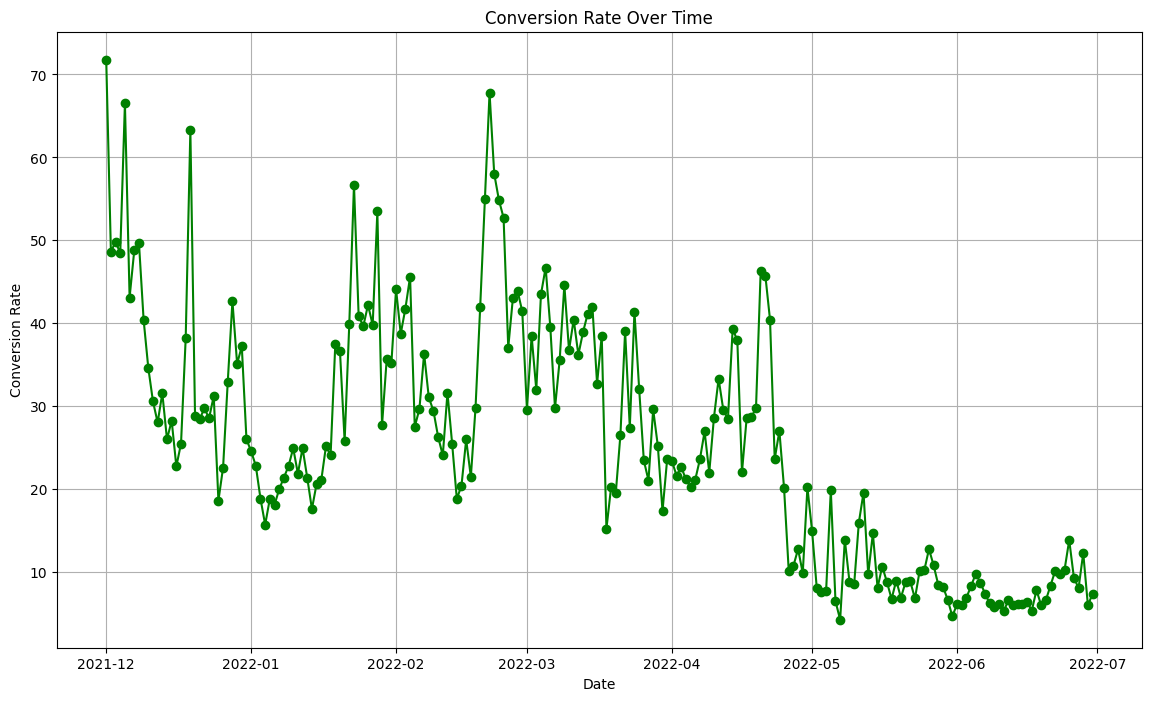

In [203]:
plt.figure(figsize=(14, 8))

# Plot Conversion Rate over time
plt.plot(df['Day Index'], df['Conversion Rate'], marker='o', linestyle='-', color='green')

plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Over Time')
plt.grid(True)
plt.show()


As, we date passes CRT decreases.

# Importants Graphs

   Cluster  Quantity
0        1    502.00
1        2    672.67
2        3    659.67
3        4    598.67
4        5    586.34
5        6    532.00
6        7    144.00


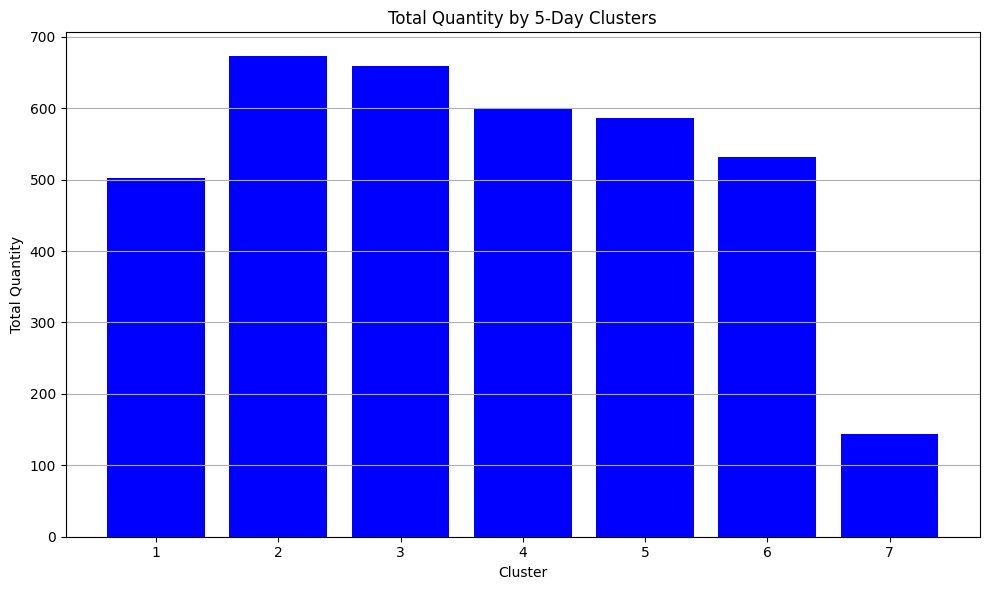

In [204]:
# Create cluster groups of 5 days

df['Cluster'] = (df['Day'] // 5) + 1

# Aggregate total quantity for each cluster
cluster_quantity = df.groupby('Cluster')['Quantity'].sum().reset_index()

# Display the updated DataFrame
print(cluster_quantity)

plt.figure(figsize=(10, 6))

# Plot the bar chart for each cluster
plt.bar(cluster_quantity['Cluster'], cluster_quantity['Quantity'], color='blue')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by 5-Day Clusters')
plt.xticks(cluster_quantity['Cluster'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

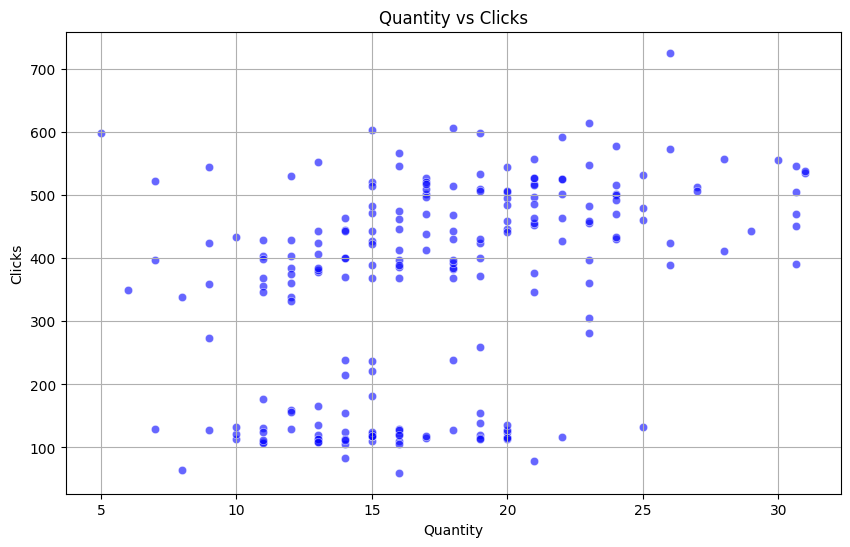

In [205]:
plt.figure(figsize=(10, 6))

# Scatter plot of Quantity vs Clicks
plt.scatter(df['Quantity'], df['Clicks'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Quantity')
plt.ylabel('Clicks')
plt.title('Quantity vs Clicks')
plt.grid(True)
plt.show()


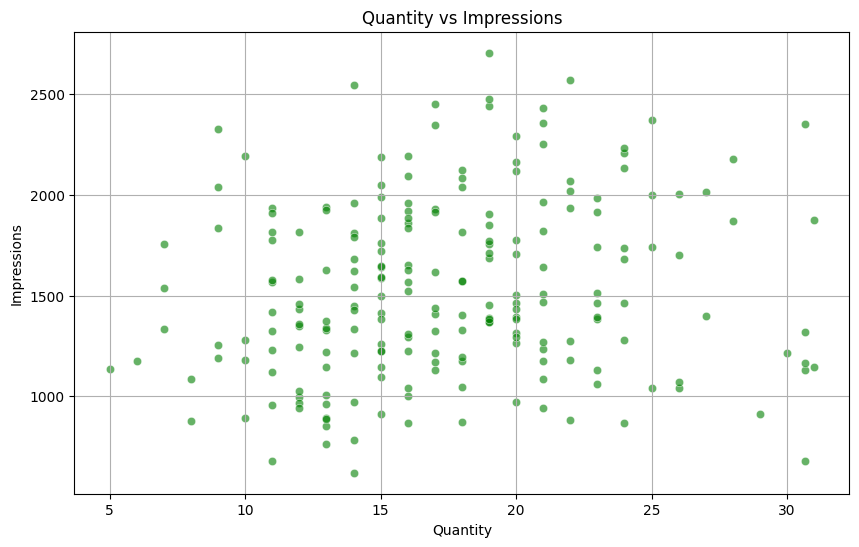

In [206]:
plt.figure(figsize=(10, 6))

# Scatter plot of Quantity vs Impressions
plt.scatter(df['Quantity'], df['Impressions'], color='green', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Quantity')
plt.ylabel('Impressions')
plt.title('Quantity vs Impressions')
plt.grid(True)
plt.show()

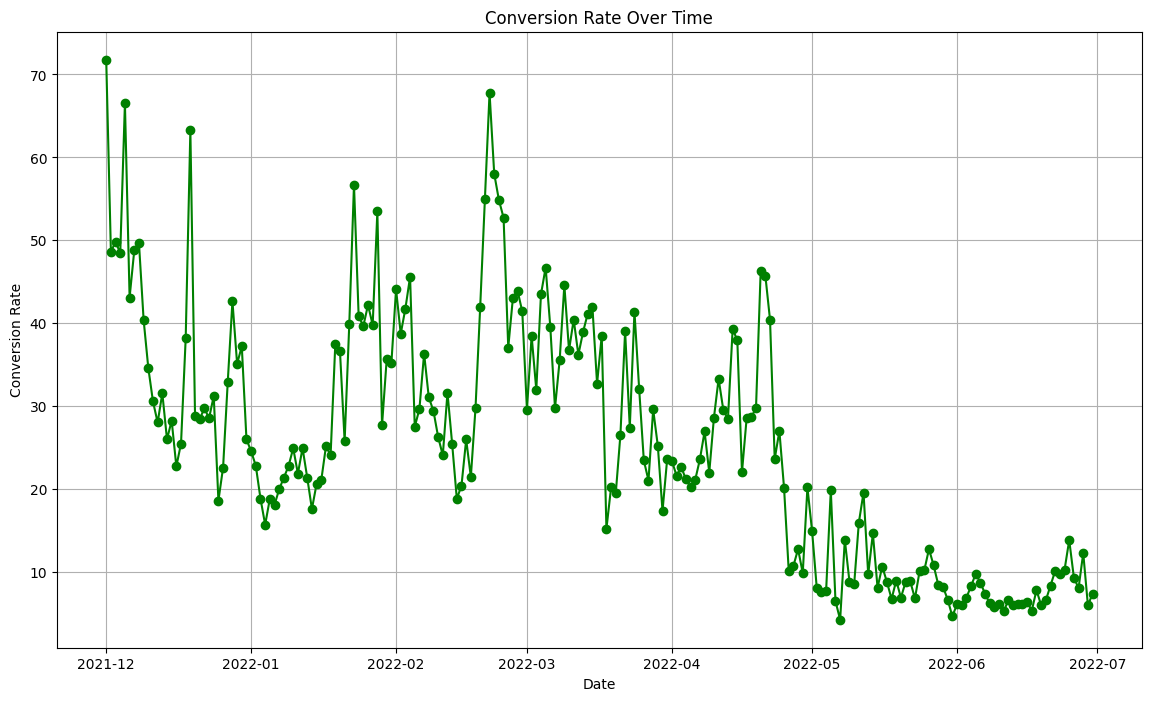

In [207]:
plt.figure(figsize=(14, 8))

# Plot Conversion Rate over time
plt.plot(df['Day Index'], df['Conversion Rate'], marker='o', linestyle='-', color='green')

plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Over Time')
plt.grid(True)
plt.show()

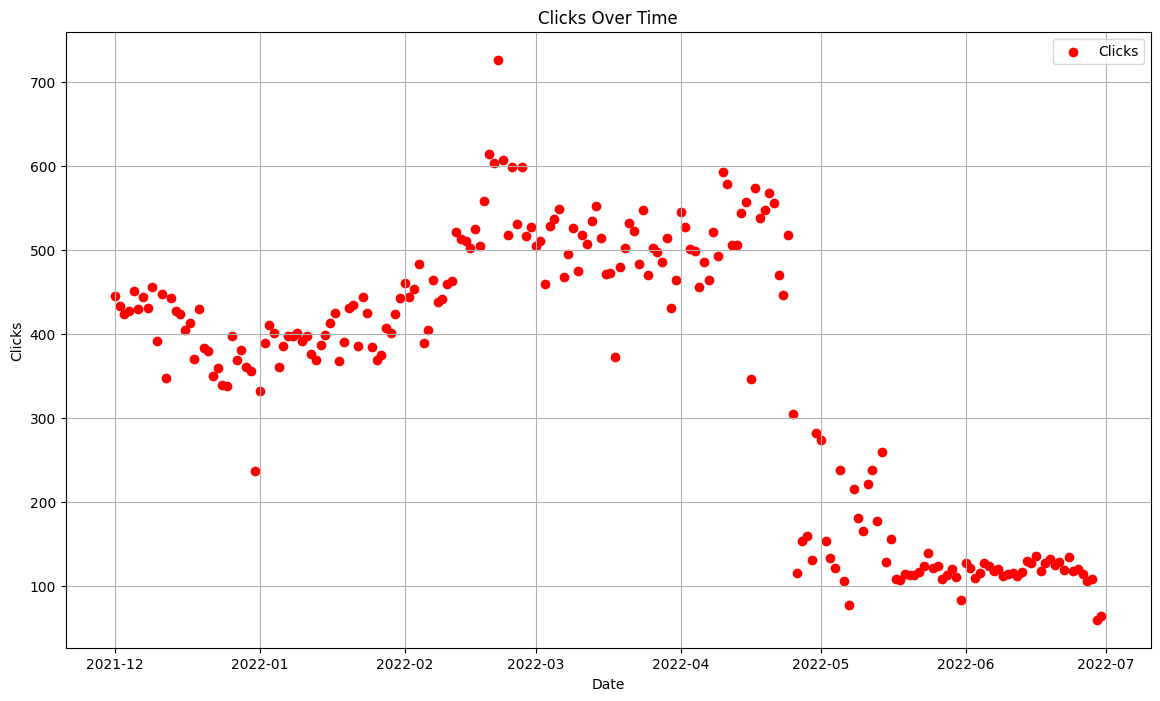

In [208]:
plt.figure(figsize=(14, 8))

# Plot Clicks over time
plt.scatter(df['Day Index'], df['Clicks'], marker='o', label='Clicks', color='red')

plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Clicks Over Time')
plt.legend()
plt.grid(True)
plt.show()


# Feature Engineering

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Day Index        212 non-null    datetime64[ns]
 1   Quantity         212 non-null    float64       
 2   Impressions      212 non-null    float64       
 3   Clicks           212 non-null    float64       
 4   Year             212 non-null    int32         
 5   Month            212 non-null    int32         
 6   Day              212 non-null    int32         
 7   Conversion Rate  212 non-null    float64       
 8   Cluster          212 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(4)
memory usage: 11.7 KB
